<a href="https://colab.research.google.com/github/kmcshane811/AutoML/blob/main/Tabular_Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This page is generated from the corresponding jupyter notebook, that can be found on [this folder](https://github.com/fastaudio/fastaudio/tree/master/docs)

In [1]:
!pip install git+https://github.com/fastaudio/fastaudio.git
!pip install git+https://github.com/fastai/fastai/tree/v2.0-branch
!pip install -Uqq fastbook
!pip install librosa

import fastbook
fastbook.setup_book()
from fastbook import *

  Cloning https://github.com/fastaudio/fastaudio.git to /tmp/pip-req-build-qrrtwo1q
  Running command git clone -q https://github.com/fastaudio/fastaudio.git /tmp/pip-req-build-qrrtwo1q
  Created wheel for fastaudio: filename=fastaudio-0.1.4.post0.dev2+g8631a3f-py2.py3-none-any.whl size=18329 sha256=29f091b95e45901533cab22f764d6bab40f9b7021838d71d11c00a469db61bea
  Stored in directory: /tmp/pip-ephem-wheel-cache-0j8k8lar/wheels/20/af/b1/ea2a6d91971f5e3f435c6a0aa2ae8b7a010b644cc01e24b0ce
Successfully built fastaudio
  Cloning https://github.com/fastai/fastai/tree/v2.0-branch to /tmp/pip-req-build-86kwbdaq
  Running command git clone -q https://github.com/fastai/fastai/tree/v2.0-branch /tmp/pip-req-build-86kwbdaq
  fatal: repository 'https://github.com/fastai/fastai/tree/v2.0-branch/' not found
ERROR: Command errored out with exit status 128: git clone -q https://github.com/fastai/fastai/tree/v2.0-branch /tmp/pip-req-build-86kwbdaq Check the logs for full command output.
     |██████████

**COLAB USERS: Before you continue and import the lib, go to the `Runtime` menu and select `Restart Runtime`.**

In [2]:
from fastai.vision.all import *
from fastai.vision.all import cnn_learner
from fastaudio.core.all import *
from fastaudio.augment.all import *
from fastaudio.ci import skip_if_ci
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib

from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

/usr/local/lib/python3.6/dist-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [3]:
from google.colab import files
! pip install -q kaggle
print("Upload Kaggle Json")
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from kaggle import api 
! kaggle datasets download --force -d kinguistics/heartbeat-sounds

Upload Kaggle Json


Saving kaggle.json to kaggle.json
ref                                                       title                                         size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
michau96/restaurant-business-rankings-2020                Restaurant Business Rankings 2020             16KB  2021-01-30 14:20:45           2807  
gpreda/reddit-wallstreetsbets-posts                       Reddit WallStreetBets Posts                    8MB  2021-02-23 07:57:52           1588  
yorkehead/stock-market-subreddits                         Stock Market Subreddits                        1MB  2021-01-29 13:53:50            305  
aagghh/crypto-telegram-groups                             Crypto telegram groups                       297MB  2021-02-02 09:58:25            183  
timoboz/superbowl-history-1967-2020                       Superbowl History 1967 - 2

In [4]:
import os

In [5]:
! unzip heartbeat-sounds.zip

Archive:  heartbeat-sounds.zip
  inflating: set_a.csv               
  inflating: set_a/Aunlabelledtest__201012172010.wav  
  inflating: set_a/Aunlabelledtest__201101051105.wav  
  inflating: set_a/Aunlabelledtest__201101061552.wav  
  inflating: set_a/Aunlabelledtest__201101091156.wav  
  inflating: set_a/Aunlabelledtest__201101110659.wav  
  inflating: set_a/Aunlabelledtest__201101152256.wav  
  inflating: set_a/Aunlabelledtest__201101220549.wav  
  inflating: set_a/Aunlabelledtest__201101241434.wav  
  inflating: set_a/Aunlabelledtest__201102081033.wav  
  inflating: set_a/Aunlabelledtest__201102081045.wav  
  inflating: set_a/Aunlabelledtest__201102200848.wav  
  inflating: set_a/Aunlabelledtest__201103011036.wav  
  inflating: set_a/Aunlabelledtest__201103140236.wav  
  inflating: set_a/Aunlabelledtest__201103170122.wav  
  inflating: set_a/Aunlabelledtest__201103200518.wav  
  inflating: set_a/Aunlabelledtest__201103201314.wav  
  inflating: set_a/Aunlabelledtest__201103232251.wa

In [ ]:
files.upload()

Saving dataset (1).csv to dataset (1).csv


{'dataset (1).csv': b'chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label\r\n0.488145649,0.01448516,2244.761197,2283.059735,4644.706364,0.104490929,-293.7504883,104.1985016,-13.73309898,20.38631439,-14.9021244,-3.167678118,-16.00013542,-3.979293108,-9.661100388,-7.055252552,-11.20767021,-3.689688683,-9.185965538,-1.036245704,-5.822994709,-1.063751698,-6.595941067,0.507068634,-5.990455151,0.266567856,artifact\r\n0.72561115,0.068417542,141.7862143,480.5530839,191.9729132,0.004847119,-486.3360596,75.9469986,66.33751678,53.17708969,40.21907043,29.62756348,22.43731117,18.08031464,15.48749161,13.36545753,11.08152199,8.412282944,5.743015766,3.497514248,2.066040993,1.417785525,1.377681613,1.552210569,1.666286707,1.561609149,murmur\r\n0.654070795,0.034783036,1764.81207,1765.835324,3429.606581,0.155970623,-399.8850403,126.731636,3.1

Opening the metadata file (For this particular model, the csv file must contain a filename and category (aka label) column.

In [ ]:
path = Path()
meta = path.ls(file_exts=".csv")
print(meta)
csv_path = '/content/' + str(meta[-1])
df = pd.read_csv('/content/set_a_adjusted.csv')
print(path.ls())
file = str(input("Enter the filename that contains the dataset: "))
if file=="":
  file = "/content/"
else:
  file = "/content/"+file+"/"
print(file)
x = str(input("Enter column name containing filenames: "))
y = str(input("Enter column name containing labels: "))
df.head()




[Path('set_b.csv'), Path('set_a_timing.csv'), Path('set_a.csv'), Path('set_a_adjusted.csv')]
[Path('.config'), Path('gdrive'), Path('set_b'), Path('set_b.csv'), Path('set_a_timing.csv'), Path('set_a'), Path('set_a.csv'), Path('heartbeat-sounds.zip'), Path('set_a_adjusted.csv'), Path('kaggle.json'), Path('sample_data')]
Enter the filename that contains the dataset: set_a
/content/set_a/
Enter column name containing filenames: fname
Enter column name containing labels: label


,dataset,fpath,label,sublabel,fname
0,a,set_a/artifact__201012172012.wav,artifact,NaN,artifact__201012172012.wav
1,a,set_a/artifact__201105040918.wav,artifact,NaN,artifact__201105040918.wav
2,a,set_a/artifact__201105041959.wav,artifact,NaN,artifact__201105041959.wav
3,a,set_a/artifact__201105051017.wav,artifact,NaN,artifact__201105051017.wav
4,a,set_a/artifact__201105060108.wav,artifact,NaN,artifact__201105060108.wav


Creating the CSV

Creating the header

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


Extracting the features

In [ ]:
tabFile = open('dataset.csv', 'w', newline='')
with tabFile:
    writer = csv.writer(tabFile)
    writer.writerow(header)
    for filename in os.listdir(file):
        songname = filename
        if songname.find("unlabelled")==-1:
         y, sr = librosa.load('/content/set_a/'+songname, mono=True, duration=30)
         rmse = librosa.feature.rms(y=y)[0]
         chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
         spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
         spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
         rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
         zcr = librosa.feature.zero_crossing_rate(y)
         mfcc = librosa.feature.mfcc(y=y, sr=sr)
         label = list(df[df.fname == filename]['label'])
         to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
         for e in mfcc:
           to_append += f' {np.mean(e)}'
         to_append += f' {label[0]}'
         tabFile = open('dataset.csv', 'a', newline='')
         with tabFile:
             writer = csv.writer(tabFile)
             writer.writerow(to_append.split())

/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


KeyboardInterrupt: ignored

## Datablock and Dataloader preparation

Allows the model to split any categorical and continuous variables

In [6]:
def cont_cat_split(df, max_card=20, dep_var=None):
    "Helper function that returns column names of cont and cat variables from given `df`."
    cont_names, cat_names = [], []
    for label in df:
        if label in L(dep_var): continue
        if (pd.api.types.is_integer_dtype(df[label].dtype) and
            df[label].unique().shape[0] > max_card or
            pd.api.types.is_float_dtype(df[label].dtype)):
            cont_names.append(label)
        else: cat_names.append(label)
    return cont_names, cat_names

In [7]:
df_nn = pd.read_csv('/content/dataset.csv',low_memory= False)
dep_var = 'label'
df_nn = df_nn.astype({"mfcc10": float})
df_nn.head()
for i in range(0,27):
  print(str(df_nn.dtypes[i]) + " " + str(i))

float64 0
float64 1
float64 2
float64 3
float64 4
float64 5
float64 6
float64 7
float64 8
float64 9
float64 10
float64 11
float64 12
float64 13
float64 14
float64 15
float64 16
float64 17
float64 18
float64 19
float64 20
float64 21
float64 22
float64 23
float64 24
float64 25
object 26


Creating the Datablock

In [8]:
procs_nn = [Categorify, FillMissing, Normalize]
cont_nn,cat_nn = cont_cat_split(df_nn, max_card=9000, dep_var=dep_var)
print(cont_nn)
print(cat_nn)
to_nn = TabularPandas(df_nn, procs_nn, cont_nn, y_names=dep_var,splits =RandomSplitter(valid_pct=0.2)(range_of(df_nn)))
to_nn.show(100)

['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']
[]


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
104,0.526195,0.00304328,4931.1,2300.42,7059.62,0.451931,-645.303,49.5306,-17.568,15.6031,1.37412,6.57515,-3.17981,5.66706,-4.55933,1.207,-3.7851,-0.155037,-5.10579,-0.69715,-4.06613,-1.88863,-6.56141,-4.25193,-4.57585,-1.16574,artifact
30,0.542785,0.0106103,1546.36,2324.2,3519.1,0.0661442,-436.759,111.418,28.9851,34.8528,13.0188,20.75,10.202,11.0631,-4.51918,0.527888,-7.19811,1.28176,-3.47547,0.333664,-8.01289,-3.2139,-6.89157,-1.44842,-6.62297,-2.25347,murmur
29,0.180151,0.485153,448.382,282.969,439.821,0.0359604,-336.393,140.651,32.2863,-21.352,-20.1473,-19.0241,-31.141,-38.0521,-35.1366,-30.7606,-28.2429,-25.2224,-20.0604,-14.6344,-5.20814,17.5623,47.3106,60.2256,46.5641,18.4095,artifact
60,0.717325,0.0186818,2554.61,2549.61,5316.99,0.241914,-520.681,60.9006,19.4137,22.9306,17.5677,11.8322,15.254,8.04443,-2.67534,-1.2166,-2.52894,-1.41472,-1.23753,-4.43193,-7.21708,-5.22648,-5.75263,-4.23807,-3.49701,-4.22423,normal
110,0.650195,0.0233728,2388.91,2101.93,4557.94,0.185142,-390.952,96.4039,-3.85203,8.29477,-0.943255,-0.730452,-6.00164,-1.95335,-6.75552,-5.01077,-7.60442,-4.70371,-6.75028,-3.62639,-5.68385,-3.74597,-5.58031,-2.18966,-3.5694,-1.99532,artifact
1,0.725611,0.0684175,141.786,480.553,191.973,0.00484712,-486.336,75.947,66.3375,53.1771,40.2191,29.6276,22.4373,18.0803,15.4875,13.3655,11.0815,8.41228,5.74302,3.49751,2.06604,1.41779,1.37768,1.55221,1.66629,1.56161,murmur
8,0.614086,0.0152221,1544.27,2152.64,3394.2,0.0832054,-408.132,113.68,11.5628,35.3943,16.8216,26.2198,6.57979,9.08947,-0.00943162,5.48404,-2.19013,1.66924,-5.1094,-0.151792,-4.60566,-1.10555,-5.81979,-1.61985,-5.76296,-1.46295,murmur
71,0.562381,0.0272987,1102.63,1901.7,2376.93,0.0358488,-365.401,125.641,19.006,47.139,19.316,19.619,6.43843,13.5298,3.20053,3.83723,-1.45952,1.29498,-5.14553,-2.46461,-5.75366,-3.83631,-4.82241,-2.26813,-5.70065,-2.54607,murmur
102,0.659509,0.0602482,160.534,500.065,203.715,0.00734992,-486.151,76.3655,66.8601,54.0577,41.1095,30.4022,22.8681,18.0626,14.8097,11.9713,8.95078,5.77942,2.88295,0.736271,-0.409698,-0.632681,-0.26761,0.27503,0.692671,0.880026,murmur
112,0.646812,0.0220854,2400.25,2848.48,5796.99,0.101671,-316.636,76.4668,20.8862,35.0737,14.1808,21.4413,9.39999,14.9146,5.70084,10.9722,2.18447,7.11666,-1.24851,4.57426,-2.88261,3.14163,-2.86824,2.87105,-3.35433,1.95623,normal


In [ ]:
for i in range(0,len(cont_nn)):
  df_nn = df_nn.astype({cont_nn[i]:np.float32})
for i in range(0,27):
  print(str(df_nn.dtypes[i]) + " " + str(i))

In [16]:
dls = to_nn.dataloaders(64)

## Learner and Training

While creating the learner, we need to indicate that our input spectrograms only have one channel. Besides that, it's the usual vision learner.

In [24]:
learn = tabular_learner(dls,metrics= accuracy)
                        

In [25]:
@skip_if_ci
def run_learner():
    # epochs are a bit longer due to the chosen melspectrogram settings
    learn.fine_tune(10)

# We only validate the model when running in CI
run_learner()

epoch,train_loss,valid_loss,accuracy,time
0,1.398046,1.393647,0.166667,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.364654,1.392212,0.166667,00:00
1,1.319289,1.390566,0.166667,00:00
2,1.250411,1.388713,0.166667,00:00
3,1.166072,1.386859,0.166667,00:00
4,1.077173,1.385082,0.375000,00:00
5,1.001656,1.383036,0.375000,00:00
6,0.934126,1.381054,0.375000,00:00
7,0.874371,1.379107,0.375000,00:00
8,0.823197,1.376870,0.375000,00:00
9,0.781278,1.375506,0.375000,00:00


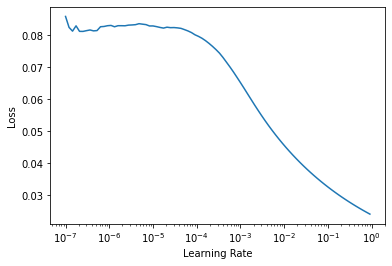

In [27]:
lr_min, lr_steep = learn.lr_find()

In [26]:
learn.fine_tune(10, base_lr = lr_steep)

epoch,train_loss,valid_loss,accuracy,time
0,0.425247,1.373901,0.375000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.415864,1.372218,0.375000,00:00
1,0.395425,1.370363,0.375000,00:00
2,0.374886,1.368395,0.375000,00:00
3,0.347912,1.366582,0.375000,00:00
4,0.322628,1.365135,0.375000,00:00
5,0.295411,1.363963,0.375000,00:00
6,0.270504,1.363213,0.375000,00:00
7,0.248806,1.363539,0.375000,00:00
8,0.230553,1.364127,0.375000,00:00
9,0.214806,1.364062,0.375000,00:00


In [ ]:
learn.export()